In [68]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [63]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [8]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

In [9]:
train.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [11]:
train.dtypes

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
Street            object
Alley             object
LotShape          object
LandContour       object
Utilities         object
LotConfig         object
LandSlope         object
Neighborhood      object
Condition1        object
Condition2        object
BldgType          object
HouseStyle        object
OverallQual        int64
OverallCond        int64
YearBuilt          int64
YearRemodAdd       int64
RoofStyle         object
RoofMatl          object
Exterior1st       object
Exterior2nd       object
MasVnrType        object
MasVnrArea       float64
ExterQual         object
ExterCond         object
Foundation        object
                  ...   
BedroomAbvGr       int64
KitchenAbvGr       int64
KitchenQual       object
TotRmsAbvGrd       int64
Functional        object
Fireplaces         int64
FireplaceQu       object
GarageType        object
GarageYrBlt      float64


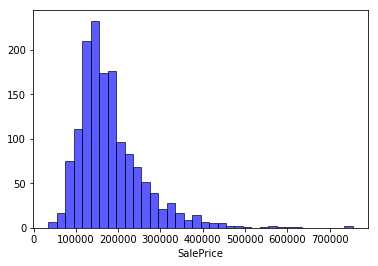

In [38]:
#Plotting distribution of houses prices
sns.distplot(train['SalePrice'], hist=True, kde=False, 
             bins=int(180/5), color = 'blue',
             hist_kws={'edgecolor':'black'})
plt.show()

In [44]:
floats = train.loc[:, train.dtypes == np.float64]# or train.dtypes == int64 ]
ints =  train.loc[:, train.dtypes == np.int64]
numericals = pd.concat([floats, ints], axis=1)

In [52]:
numericals.columns

Index(['LotFrontage', 'MasVnrArea', 'GarageYrBlt', 'Id', 'MSSubClass',
       'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF',
       '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath',
       'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

In [55]:
X = numericals.drop('SalePrice', axis = 1)

In [70]:
y = numericals['SalePrice']

In [74]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [75]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(1168, 37)
(292, 37)
(1168,)
(292,)


In [82]:
X_train= X_train.fillna(0)
y_train = y_train.fillna(0)
X_test = X_test.fillna(0)
y_test = y_test.fillna(0)

In [88]:
lr = LinearRegression()
lr.fit(X_train,y_train)
test_pre = lr.predict(X_test)
train_pre = lr.predict(X_train)

In [89]:
print('rmse on train',rmse_CV_train(lr).mean())
print('rmse on test',rmse_CV_test(lr).mean())

NameError: name 'rmse_CV_train' is not defined

In [90]:
test_pre

array([127921.19017963, 307452.10463675, 244276.8736635 , 130318.56183937,
       133464.65687197, 136225.96411387, 177830.47306115, 200820.48835191,
       112695.08310032, 197865.85743107, 137174.23641078,  96237.93415499,
        88206.36567996, 109398.50770144, 196322.65131705, 337329.10997646,
       254957.20614607, 172661.64474975, 125290.8073167 , 116091.07323534,
       177710.50449263, 115152.80305481, 124870.64851858, 207472.3558928 ,
        63072.46108937,  42499.7074773 , 309547.76524583, 301928.52662782,
       239324.58158511,  93606.24791393, 216011.13548229, 246001.30400757,
       243334.40574136, 318838.60302826,  80428.55669141, 267427.33598472,
       180929.07193823, 282246.36071168, 278708.84046357, 101721.73441519,
       120169.60601701, 158148.54819655, 183939.37563665, 301844.05210005,
       110874.33379509, 189124.4189032 ,  67667.53867732, 217430.05981105,
       107805.6276251 , 221581.80512522, 194182.40935338,  62770.48194711,
       101593.91944075, 1

In [95]:
floats_val = test.loc[:, test.dtypes == np.float64]# or train.dtypes == int64 ]
ints_val =  test.loc[:, test.dtypes == np.int64]
numericals_val = pd.concat([floats_val, ints_val], axis=1)
x_val = numericals_val
x_val = x_val.fillna(0)
val_pre = lr.predict(x_val)

In [96]:
val_pre

array([ 8319396.31887044, 12339383.81171837,  9778345.8834292 , ...,
       11535771.04602862,  8311192.83919976, 10907738.31375737])

In [98]:
ids = test['Id']

In [106]:
y_pred = pd.DataFrame(val_pre)
y_pred["Id"] = ids

In [107]:
y_pred

,0,Id
0,8.319396e+06,1461
1,1.233938e+07,1462
2,9.778346e+06,1463
3,9.688359e+06,1464
4,1.171448e+07,1465
5,8.436435e+06,1466
6,1.104488e+07,1467
7,8.314535e+06,1468
8,1.238668e+07,1469
9,8.208462e+06,1470


In [108]:
y_pred = y_pred.rename(columns={0: "SalePrice"})
y_pred = y_pred[["Id","SalePrice"]]
y_pred.to_csv("Submission.csv", index=False)
